In [1]:
import pandas as pd
import numpy as np
import math 

df_train=pd.read_csv('ml_data/trainData.csv',header=None)
df_test=pd.read_csv('ml_data/testData.csv',header=None)
df_val_data=pd.read_csv('ml_data/valData.csv',header=None)
df_val_label=pd.read_csv('ml_data/valLabels.csv',header=None)
y_train=pd.read_csv('ml_data/trainLabels.csv',header=None)



In [2]:
def ridge_regression(X, y, lam):
    
    X=X.values[0:,1:] #5000*3000
    
    y=y.values[0:,1:] #5000*1 
    
    ones = np.ones(len(X),dtype=int)
    X_bar = np.column_stack((X,ones))#5000*3001
    X_bar_t = np.transpose(X_bar)# 3001*5000
   
    
    d=np.dot(X_bar_t,y) #3001*1
   
    zeros=np.zeros(3000)
    zeros_t=np.transpose(np.zeros(3001))
    
    I_mat=np.row_stack((np.identity(3000),zeros))
    I_mat=np.column_stack((I_mat,zeros_t))
    
    lambda_identity = lam*I_mat#3001*3001
    #C inverse
    C_inv = np.linalg.inv(np.dot(X_bar_t, X_bar)+lambda_identity)
    
    w_bar = np.dot(C_inv,d )
    
    #weights
    w=w_bar[0:3000,0:]
    #bias
    b=w_bar[3000:,0:]
    
    #cvErrs
    cvErrs=pd.DataFrame([])
    for i in range(5000):
        num=np.dot(np.transpose(w_bar),X_bar[i,0:]) -y[i,0:]
        den=1-np.dot((np.dot(np.transpose(X_bar[i,0:]),C_inv)),X_bar[i,0:])
        temp=pd.DataFrame(num/den)
        cvErrs=cvErrs.append(temp)
    
    #objective function
    t1=lam*(np.matmul(np.transpose(w),w))
    t2=np.dot(X_bar,w_bar)-y
    obj=t1+np.dot(np.transpose(t2),t2)
 
   
    return w,b,obj,cvErrs







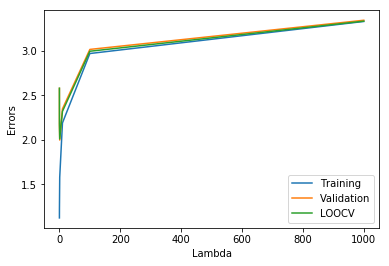

[[ 1.01857712]]
[[ 17200.94056872]]


TypeError: 'float' object is not subscriptable

In [14]:
# df_test=df_test.values[0:,1:]
# pred=np.dot(df_test,w)+b
from math import sqrt
lam=0.01
rmse_t=[]
rmse_v=[]
rmse_l=[]
obj_l=[]
for k in range (6):
    w,b,obj,cvErrs=ridge_regression(df_train,y_train,(lam)*(10)**k)
    pred_train=np.dot(df_train.values[0:,1:],w)+b
    pred_val=np.dot(df_val_data.values[0:,1:],w)+b
    obj_l.append(obj)
    sum_l=0
    sum_t=0
    sum_v=0
    for i in range(5000):
        sum_l=sum_l+cvErrs.values[i]**2
        sum_t=sum_t+(y_train.values[i,1:]-pred_train[i])**2
        sum_v=sum_v+(df_val_label.values[i,1:]-pred_val[i])**2
    
    
    
    sum_t=(sum_t/5000)
    sum_v=(sum_v/5000)
    sum_l=(sum_l/5000)
    
  
    rmse_train=sqrt(sum_t)
    rmse_val=sqrt(sum_v)
    rmse_loocv=sqrt(sum_l) 
    

    
    rmse_t.append(rmse_train)
    rmse_v.append(rmse_val)
    rmse_l.append(rmse_loocv)

  
import matplotlib.pyplot as p
x_axis=[0.01,0.1,1,10,100,1000]
p.plot(x_axis, rmse_t, label="Training")
p.plot(x_axis, rmse_v, label="Validation")
p.plot(x_axis, rmse_l, label="LOOCV")
p.legend()
p.xlabel("Lambda")
p.ylabel("Errors")
p.show()

print (1*np.dot(np.transpose(w),w))# regularization term
print (obj_l[2])# objective function value for lam=1
print (rmse_t[2])# sum of squared errors

# sub=pd.DataFrame(pred)
# sub.index.names = ['Id']
# sub.to_csv("predTestLabels.csv",header=['Prediction'])


 

In [16]:

print (1*np.dot(np.transpose(w),w))# regularization term
print (obj_l[2])# objective function value for lam=1
print (rmse_t[2])# sum of squared errors

[[ 1.01857712]]
[[ 17200.94056872]]
1.5780360753184544


In [279]:
w=np.absolute(w)
t=np.argsort(w, axis=0)


file=open("ml_data/featureTypes.txt","r")
features=[]
for line in file:
    features.append(line[:-1])
print ("Top Important Features :")
for i in range(10):
    print (features[t[2999-i].item()],)
print ("Least Important Features :")
for i in range(10):
    print (features[t[i].item()])

[[1045]
 [2310]
 [  95]
 ..., 
 [ 773]
 [ 754]
 [ 184]]
Top Important Features :
infused [[ 6.99895338]]
pineapple orange [[ 5.66326052]]
red [[ 5.63652345]]
flavors nice [[ 5.28034641]]
sweet black [[ 5.19472756]]
little heavy [[ 5.12850509]]
new french [[ 5.07889124]]
future [[ 4.84825814]]
currant cola [[ 4.78681932]]
cocktail [[ 4.73595309]]
Lest Important Features :
offers
light body
highlights
franc petit verdot
framed
tannins frame
tannins finish
sour
flavors black cherry
oakville
